
Morphological transformations are a set of operations commonly used in image processing for modifying the structure of elements in an image. These operations are based on the shape or morphology of the features in an image rather than the numerical pixel values.

1.Erosion: This operation shrinks the boundaries of foreground objects in an image, effectively removing small white noises, detaching two connected objects, and breaking down bridges between the objects.<br>
2.Dilation: Dilation is the opposite of erosion. It enlarges the boundaries of foreground objects in an image, effectively joining broken parts of an object and increasing the object area.<br>
3.Opening: Opening is a combination of erosion followed by dilation. It is useful for removing noise from the foreground of an image while preserving the overall shape and size of the objects.<br>
4.Closing: Closing is a combination of dilation followed by erosion. It is useful for closing small holes in the foreground objects or for connecting objects that are almost touching.<br>
5.Morphological Gradient: This operation computes the difference between dilation and erosion of an image. It is useful for extracting the outline of objects.<br>
6.Top Hat: Top hat is the difference between the input image and its opening. It is useful for enhancing bright regions on dark backgrounds.<br>
7.Black Hat: Black hat is the difference between the closing of the input image and the input image itself. It is useful for enhancing dark regions on bright backgrounds.<br>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [21]:
img=cv2.imread("data/smarties.png",cv2.IMREAD_GRAYSCALE)
_,th1=cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)

title=["image","mask"]
images=[img,th1]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### removing black dots

### dialation

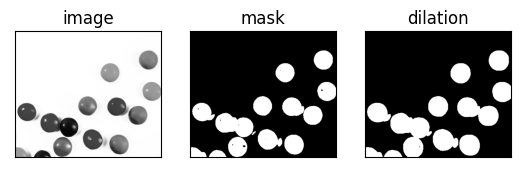

In [30]:
img=cv2.imread("data/smarties.png",cv2.IMREAD_GRAYSCALE)
_,th1=cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
kernal=np.ones((2,2),np.uint8)
dil=cv2.dilate(th1,kernal,iterations=3)
title=["image","mask","dilation"]
images=[img,th1,dil]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

#### some black dots removed
iterations

### erotion

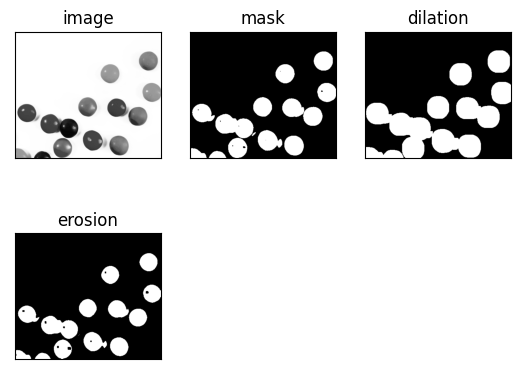

In [33]:
img=cv2.imread("data/smarties.png",cv2.IMREAD_GRAYSCALE)
_,th1=cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
kernal=np.ones((4,4),np.uint8)

dil=cv2.dilate(th1,kernal,iterations=3)

ero=cv2.erode(th1,kernal,iterations=1)

title=["image","mask","dilation","erosion"]
images=[img,th1,dil,ero]
for i in range(4):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### opening

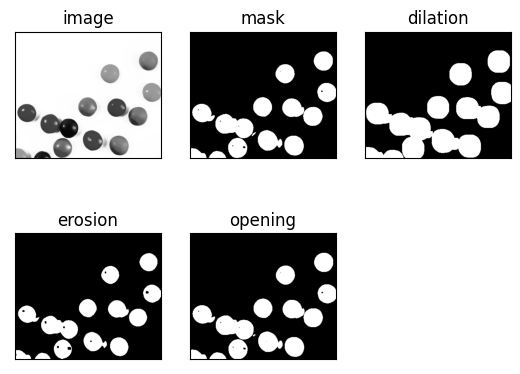

In [3]:
img=cv2.imread("data/smarties.png",cv2.IMREAD_GRAYSCALE)
_,th1=cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
kernal=np.ones((4,4),np.uint8)

dil=cv2.dilate(th1,kernal,iterations=3)
ero=cv2.erode(th1,kernal,iterations=1)

opening=cv2.morphologyEx(th1,cv2.MORPH_OPEN,kernal)

title=["image","mask","dilation","erosion","opening"]
images=[img,th1,dil,ero,opening]
for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

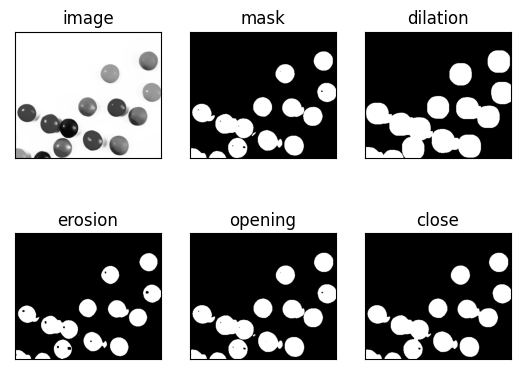

In [5]:
img=cv2.imread("data/smarties.png",cv2.IMREAD_GRAYSCALE)
_,th1=cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
kernal=np.ones((4,4),np.uint8)

dil=cv2.dilate(th1,kernal,iterations=3)
ero=cv2.erode(th1,kernal,iterations=1)
opening=cv2.morphologyEx(th1,cv2.MORPH_OPEN,kernal)

close=cv2.morphologyEx(th1,cv2.MORPH_CLOSE,kernal)

title=["image","mask","dilation","erosion","opening","close"]
images=[img,th1,dil,ero,opening,close]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### morphological gradient

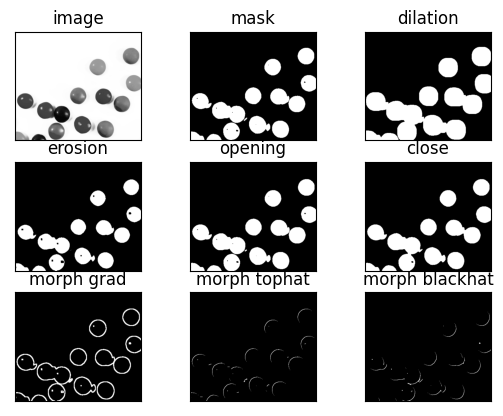

In [6]:
img=cv2.imread("data/smarties.png",cv2.IMREAD_GRAYSCALE)
_,th1=cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
kernal=np.ones((4,4),np.uint8)

dil=cv2.dilate(th1,kernal,iterations=3)
ero=cv2.erode(th1,kernal,iterations=1)
opening=cv2.morphologyEx(th1,cv2.MORPH_OPEN,kernal)
close=cv2.morphologyEx(th1,cv2.MORPH_CLOSE,kernal)

mg=cv2.morphologyEx(th1,cv2.MORPH_GRADIENT,kernal)
th=cv2.morphologyEx(th1,cv2.MORPH_TOPHAT,kernal)
bh=cv2.morphologyEx(th1,cv2.MORPH_BLACKHAT,kernal)

title=["image","mask","dilation","erosion","opening","close","morph grad","morph tophat","morph blackhat"]
images=[img,th1,dil,ero,opening,close,mg,th,bh]
for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()

morphlogical gradient=dilation-erosion <br>
tophat=image-opening